In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
x = [np.log(i) for i in range(1,100)]

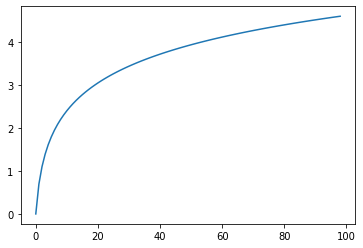

In [3]:
plt.plot(x)

# Defining signal

In [4]:
# Heaviside step function. I use eta to be consistent with my professor's notation
def eta(x):
    r = 0
    if x > 0:
        r = 1
    if x == 0:
        r = 0.5
    return r

In [5]:
def theta(t, tau):
    return eta(t / tau) - eta(t / (tau - 1))

In [6]:
# My signal
@np.vectorize
def s(t, tau, n, A):
    return ((-1)**n) * A * (1 - abs(2 * t / (tau - 1))) * np.sin((2 * np.pi * n * t) / tau) * theta(t, tau)

# Plotting with different args:

In [7]:
def plot(t, tau, n, A):
    x = np.linspace(0, t, 1024)
    y = s(x, tau, n, A)
    plt.figure()
    plt.plot(x, y)
    plt.xlabel("t")
    plt.ylabel("s(t)")
    plt.show()

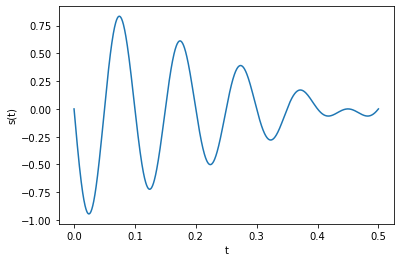

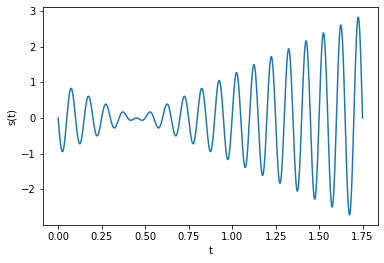

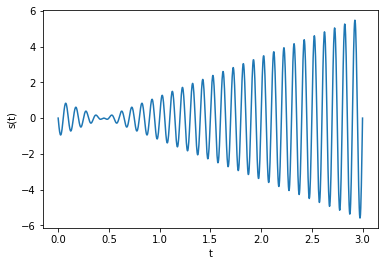

In [8]:
for i in np.linspace(0.5, 3, 3):
    plot(i, 0.1, 1, 1) 

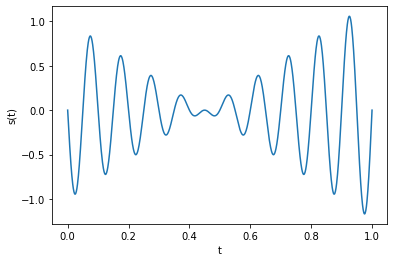

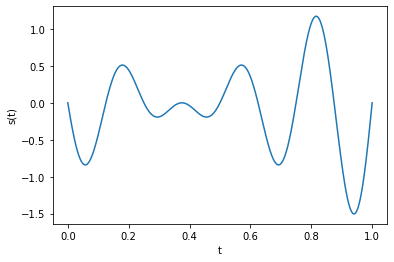

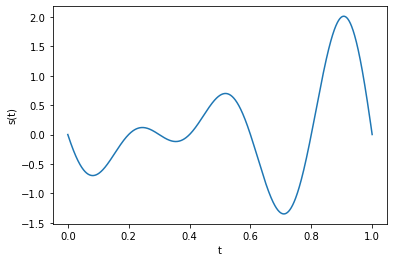

In [9]:
for tau in np.linspace(0.1, 0.4, 3):
    plot(1, tau, 1, 1)

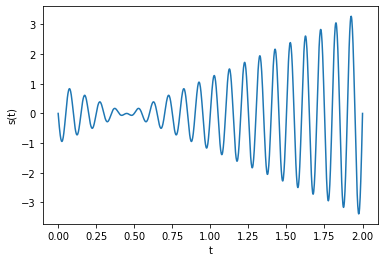

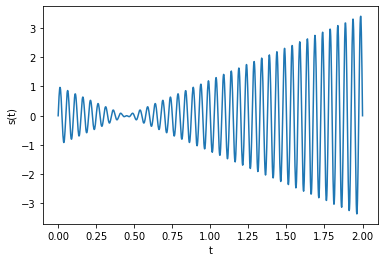

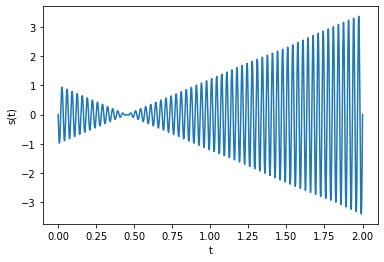

In [10]:
#for diffrent n
for n in range(1, 4):
    plot(2, 0.1, n, 1) 

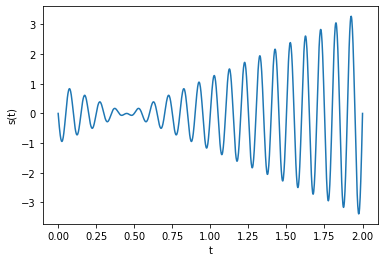

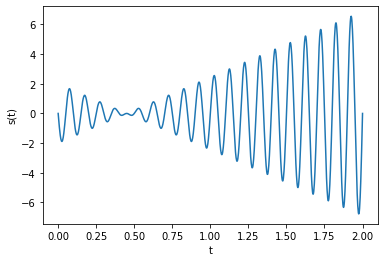

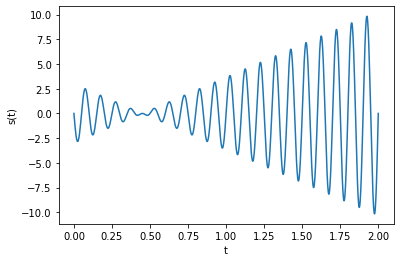

In [11]:
for a in range(1, 4):
    plot(2, 0.1, 1, a) 

#  Doing some DFT

In [12]:
from scipy import fftpack
from scipy.fft import rfft, rfftfreq, fft, ifft

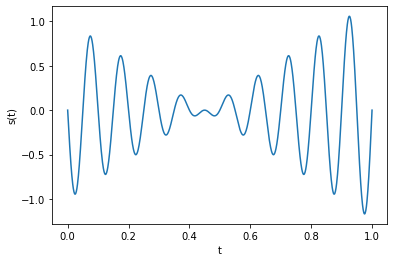

In [13]:
x = np.linspace(0, 1, 1024)
y = s(x, 0.1, 1, 1)
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlabel('t')
ax.set_ylabel('s(t)');

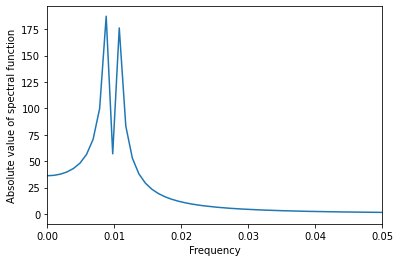

In [14]:
Y = rfft(y)
freqs = rfftfreq(len(y))  

fig, ax = plt.subplots()
ax.plot(freqs, np.abs(Y))
ax.set_xlabel('Frequency')
ax.set_ylabel('Absolute value of spectral function')
ax.set_xlim(0, 0.05)
plt.show()

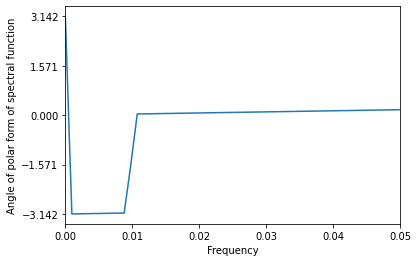

In [15]:
Y = rfft(y)
freqs = rfftfreq(len(y))  

fig, ax = plt.subplots()

ax.plot(freqs, np.angle(Y))
ax.set_xlabel('Frequency')
ax.set_ylabel('Angle of polar form of spectral function')
ax.set_xlim(0, 0.05)
plt.yticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi])
plt.show()

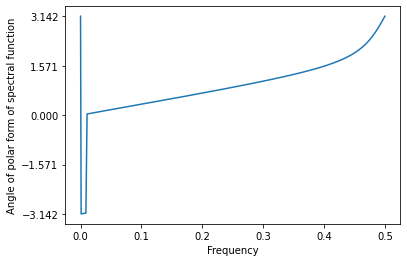

In [16]:
Y = rfft(y)
freqs = rfftfreq(len(y))  

fig, ax = plt.subplots()

ax.plot(freqs, np.angle(Y))
ax.set_xlabel('Frequency')
ax.set_ylabel('Angle of polar form of spectral function')
plt.yticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi])
plt.show()

# Invers FFT & Gibbs-like phenomenon after the removal of high freqs

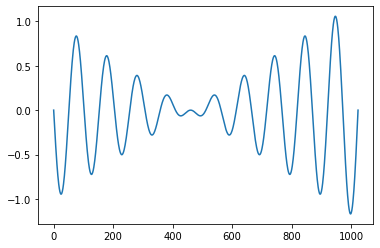

In [17]:
plt.plot(y)

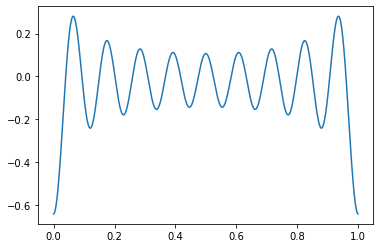

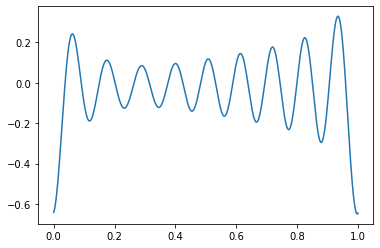

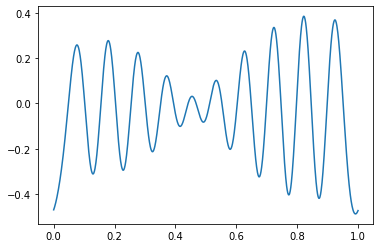

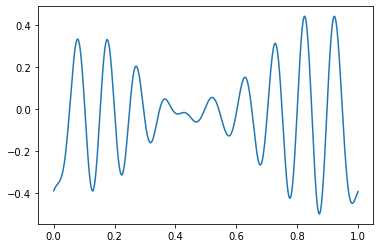

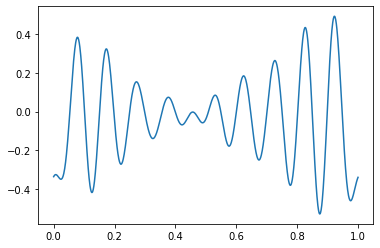

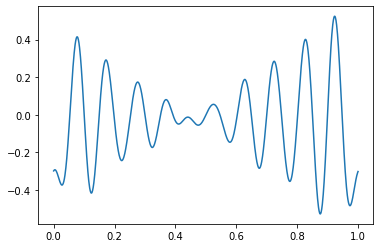

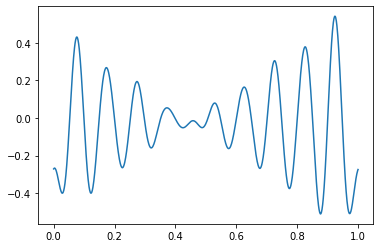

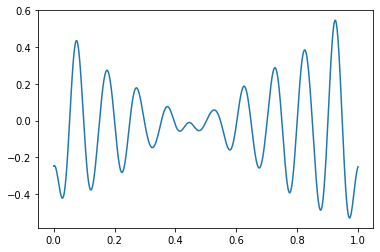

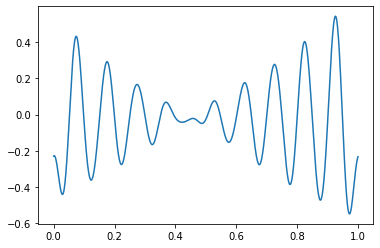

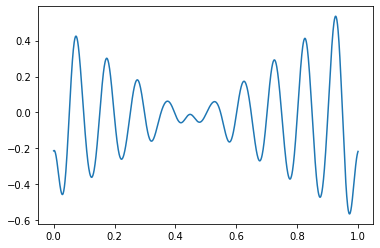

In [18]:
# zeroing high frequency points in the spectral function & doing inverse fft
for i in range(10, 20):
    sp = fft(y)
    sp[i: ] = 0
    plt.plot(x, ifft(sp).real)
    plt.show()

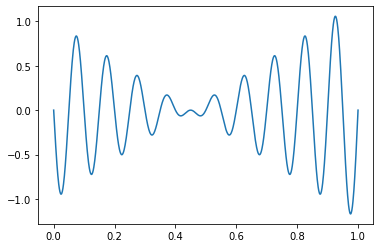

In [19]:
# comparng with the actual signa; not bad for just 20 non zero points left in the spectrum
plt.plot(x, y)

# DFT with windows

# Fuctions for STFTs

In [235]:
# They they all pretty much the same
# but with different windows and np.abs vs np.angle

def transform_boxcar_abs(wdth):
    wndw = signal.get_window('boxcar', wdth)
    x = np.linspace(0, 10, 1024)
    y = s(x, 0.1, 1, 1)
    f, t, Zxx = signal.stft(y, nperseg=wdth, window=wndw)
    fig, ax = plt.subplots()
    cmap = ax.pcolormesh(t, f, np.abs(Zxx), vmin=0, shading='gouraud')
    fig.colorbar(cmap)
    plt.title('STFT Magnitude')
    plt.ylabel('Frequency')
    plt.xlabel('Time [points/1024]')

    plt.show(fig)

   
    plt.plot(wndw)
    plt.title('Window Function')
    plt.ylabel('f(x)')
    plt.xlabel('x')
    plt.xlim(0, wdth)
    plt.show()
    
    
    
def transform_boxcar_arg(wdth):
    wndw = signal.get_window('boxcar', wdth)
    x = np.linspace(0, 10, 1024)
    y = s(x, 0.1, 1, 1)
    f, t, Zxx = signal.stft(y, nperseg=wdth, window=wndw)
    fig, ax = plt.subplots()
    cmap = ax.pcolormesh(t, f, np.angle(Zxx), vmin=0, shading='gouraud')
    fig.colorbar(cmap)
    plt.ylabel('Frequency')
    plt.xlabel('Time [points/1024]')

    plt.title('STFT Argument')
    plt.show(fig)


    plt.plot(wndw)
    plt.title('Window Function')
    plt.ylabel('f(x)')
    plt.xlabel('x')
    plt.xlim(0, wdth)
    plt.show()
    
    
def transform_gabor_arg(wdth):
    wndw = signal.general_gaussian(wdth, p=1.5, sig=wdth/4)
    x = np.linspace(0, 10, 1024)
    y = s(x, 0.1, 1, 1)
    f, t, Zxx = signal.stft(y, nperseg=wdth, window=wndw)
    fig, ax = plt.subplots()
    cmap = ax.pcolormesh(t, f, np.angle(Zxx), vmin=0, shading='gouraud')
    fig.colorbar(cmap)
    plt.ylabel('Frequency')
    plt.xlabel('Time [points/1024]')
    plt.title('Gabor Argument')
    plt.show(fig)

    plt.ylabel('Frequency')
    plt.xlabel('Time [points/1024]')

    plt.plot(wndw)
    plt.title('Window Function')
    plt.ylabel('f(x)')
    plt.xlabel('x')
    plt.xlim(0, wdth)
    plt.show()
    
def transform_gabor_abs(wdth):
    wndw = signal.general_gaussian(wdth, p=1.5, sig=wdth/4)
    x = np.linspace(0, 10, 1024)
    y = s(x, 0.1, 1, 1)
    f, t, Zxx = signal.stft(y, nperseg=wdth, window=wndw)
    fig, ax = plt.subplots()
    cmap = ax.pcolormesh(t, f, np.abs(Zxx), vmin=0, shading='gouraud')
    fig.colorbar(cmap)
    plt.ylabel('Frequency')
    plt.xlabel('Time [points/1024]')
    plt.title('Gabor Magnitude')
    plt.show(fig)

    plt.ylabel('Frequency')
    plt.xlabel('Time [points/1024]')

    plt.plot(wndw)
    plt.title('Window Function')
    plt.ylabel('f(x)')
    plt.xlabel('x')
    plt.xlim(0, wdth)
    plt.show()
    

STFT With Boxcar Of Width = 128


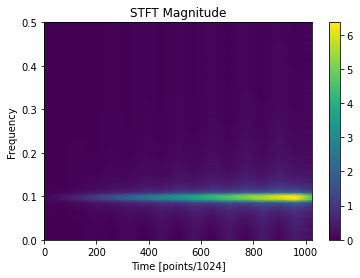

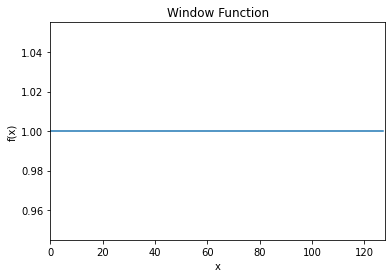

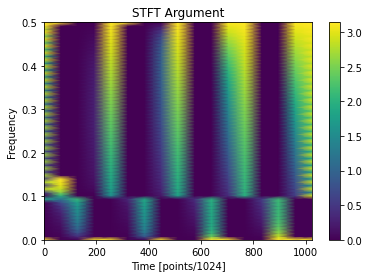

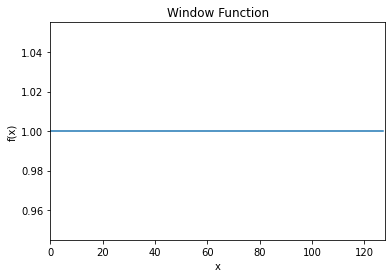

Gabor Transfrom With Window Of Width = 128


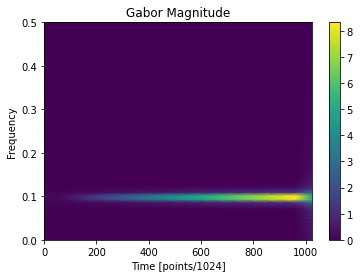

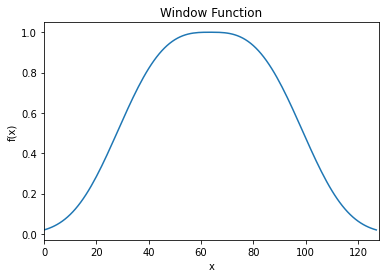

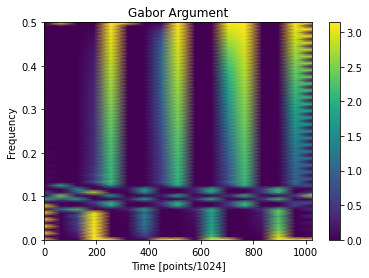

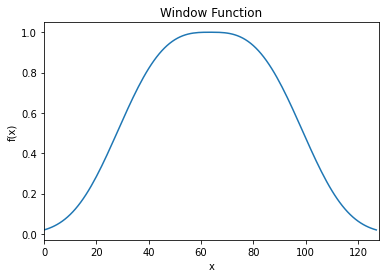

STFT With Boxcar Of Width = 256


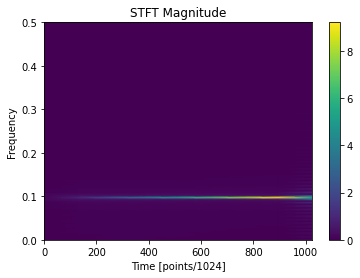

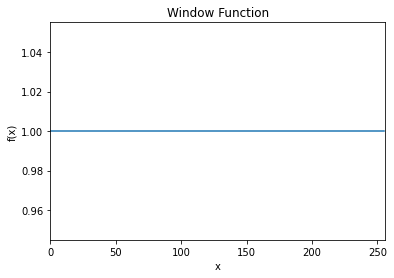

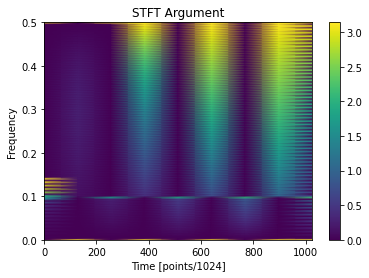

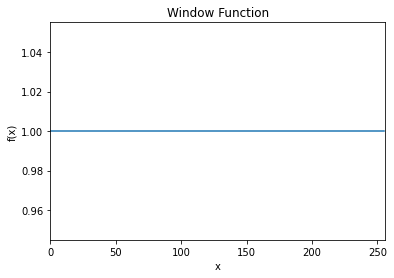

Gabor Transfrom With Window Of Width = 256


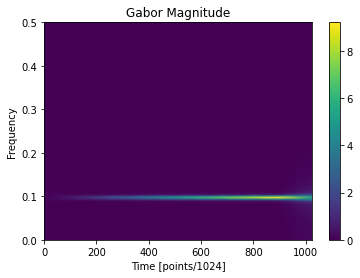

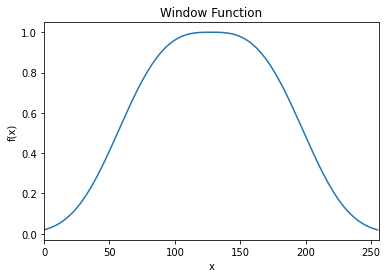

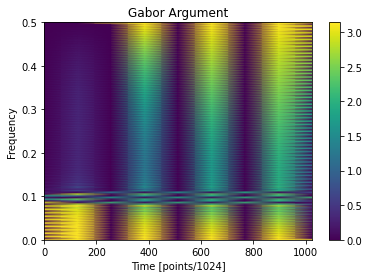

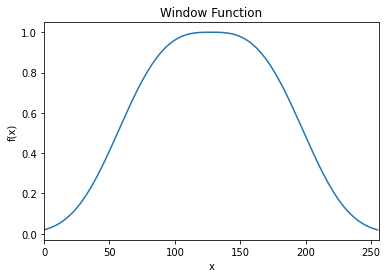

STFT With Boxcar Of Width = 512


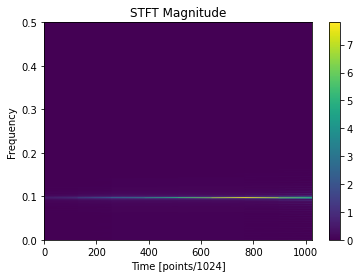

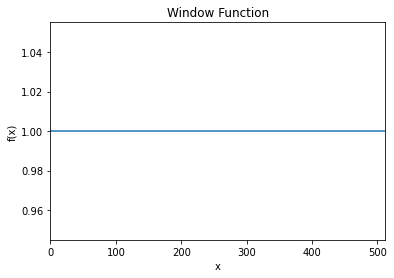

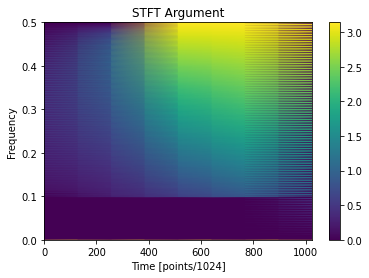

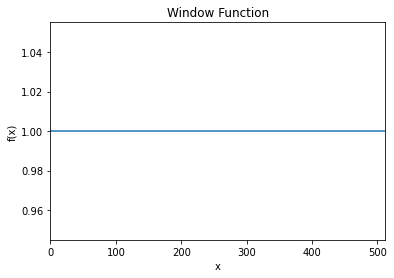

Gabor Transfrom With Window Of Width = 512


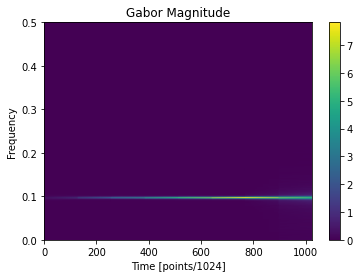

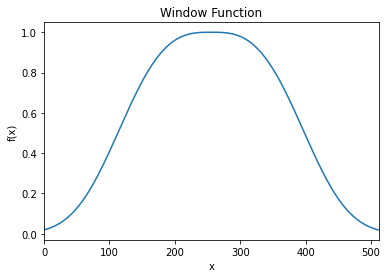

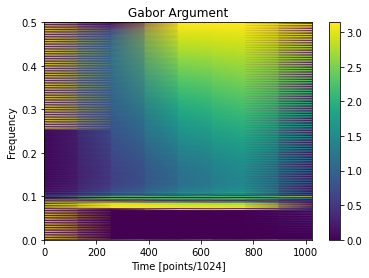

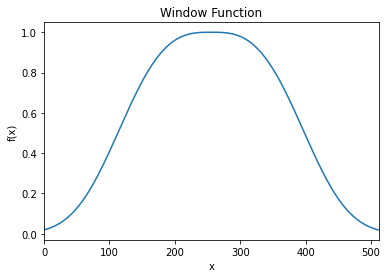

In [236]:
for i in [128, 256, 512]:
    print("STFT With Boxcar Of Width =", i)
    transform_boxcar_abs(i)
    transform_boxcar_arg(i)
    print("Gabor Transfrom With Window Of Width =", i)
    transform_gabor_abs(i)
    transform_gabor_arg(i)

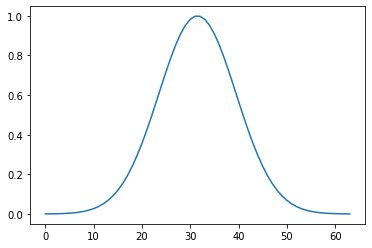

In [221]:
wdth = 64
plt.plot(signal.general_gaussian(wdth, p=1, sig=wdth/8))

In [255]:
def transform_boxcar_s(wdth):
    wndw = signal.get_window('boxcar', wdth)
    x = np.linspace(0, 100, 1024)
    y = np.sin(x)
    y[500:] += np.sin(10*x[500: ])
    f, t, Zxx = signal.stft(y, nperseg=wdth, window=wndw)
    fig, ax = plt.subplots()
    cmap = ax.pcolormesh(t, f, np.abs(Zxx), vmin=0, shading='gouraud')
    fig.colorbar(cmap)
    plt.title('STFT Argument')
    plt.ylabel('Frequency')
    plt.xlabel('Time [points/1024]')

    plt.show(fig)

    plt.ylabel('Frequency')
    plt.xlabel('Time [points/1024]')

    plt.plot(wndw)
    plt.title('Window Function')
    plt.ylabel('f(x)')
    plt.xlabel('x')
    plt.xlim(0, wdth)
    plt.show()

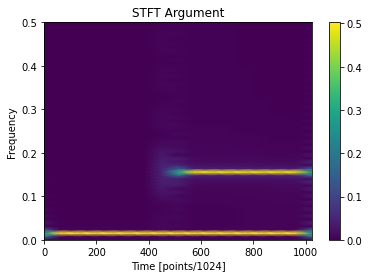

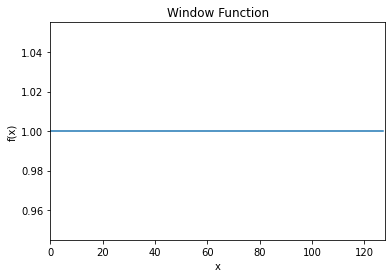

In [256]:
transform_boxcar_s(128)